In [458]:
import tensorflow as tf
from tensorflow import keras as ks
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [459]:
df=pd.read_excel(r'C:\Users\leer\Desktop\Big Data\kawaba prediction.xlsx')

In [460]:
df

,date,Number of visitor,Snow,Sunny Hours,Corona Infection,Temperature,Holiday Rank,Total Underage
0,2019-01-01,1171,0,9.2,0,4.4,2400,412
1,2019-01-02,2158,0,7.8,0,4.7,3000,789
2,2019-01-03,2422,0,7.0,0,3.0,3000,879
3,2019-01-04,2730,0,9.3,0,4.2,3000,768
4,2019-01-05,2500,0,8.5,0,6.1,3000,656
...,...,...,...,...,...,...,...,...
522,2022-04-15,85,0,0.0,555,10.7,800,1
523,2022-04-16,730,0,9.3,476,11.7,2400,28
524,2022-04-17,1205,0,5.4,513,12.0,3000,70
525,2022-04-23,448,0,7.8,349,20.1,3000,10


In [461]:
df.index=pd.to_datetime(df['date'])

In [462]:
df.head(6)

,date,Number of visitor,Snow,Sunny Hours,Corona Infection,Temperature,Holiday Rank,Total Underage
date,,,,,,,,
2019-01-01,2019-01-01,1171,0,9.2,0,4.4,2400,412
2019-01-02,2019-01-02,2158,0,7.8,0,4.7,3000,789
2019-01-03,2019-01-03,2422,0,7.0,0,3.0,3000,879
2019-01-04,2019-01-04,2730,0,9.3,0,4.2,3000,768
2019-01-05,2019-01-05,2500,0,8.5,0,6.1,3000,656
2019-01-06,2019-01-06,1879,0,5.6,0,3.4,2400,375


<AxesSubplot:xlabel='date'>

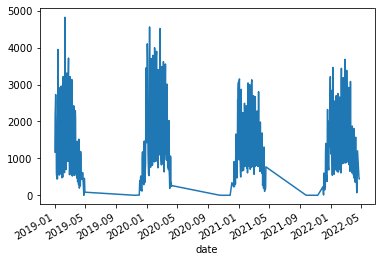

In [463]:
NOV=df['Number of visitor']
NOV.plot()

In [464]:
NOV=np.array(NOV)
NOV

array([1171, 2158, 2422, 2730, 2500, 1879,  601,  531,  443,  554,  450,
       2442, 3948, 2104,  870,  620,  854,  548, 2482, 2909,  654,  709,
        820,  575,  775, 2958, 2628,  882,  475, 1001,  749,  492, 3066,
       3217,  864, 1058,  939,  840,  614, 2848, 4820, 2651, 1321,  857,
        699,  721, 3201, 3311, 1173, 1013, 1452,  917, 1270, 3236, 3715,
        956, 1029,  971,  558,  734, 3212, 2618,  673,  810,  753,  627,
        549, 3136, 2607,  522,  753,  760,  548,  790, 2059, 2423,  608,
        892,  540, 1673,  754, 2292, 2051,  595,  676,  670,  529,  467,
       1300, 1465,  371,  429,  486,  550,  288, 1520, 1372,  195,  253,
        302,  333,  259, 1187, 1099,  430,  439,  617,    1,  190,  461,
        360,   85,    1,    2,    7,  393,  142,  459,  524,  142,  147,
        155,  134,  114, 1016, 1176,  357,  365,  454,  330,  286, 1288,
       1471,  423,  347,  406,  701,  848, 1971, 3451, 2920, 2133, 1425,
       3020, 4101, 3725, 1916, 1103,  880,  582,  6

In [465]:
X, y= [],[]

for i in range(7,len(NOV)-7):
    X.append(NOV[i-7:i])
    y.append(NOV[i:i+7])

In [466]:
X,y=np.array(X,dtype="object"),np.array(y,dtype="object")

In [467]:
pd.DataFrame(y)

,0,1,2,3,4,5,6
0,531,443,554,450,2442,3948,2104
1,443,554,450,2442,3948,2104,870
2,554,450,2442,3948,2104,870,620
3,450,2442,3948,2104,870,620,854
4,2442,3948,2104,870,620,854,548
...,...,...,...,...,...,...,...
508,355,1536,1573,412,349,357,72
509,1536,1573,412,349,357,72,85
510,1573,412,349,357,72,85,730
511,412,349,357,72,85,730,1205


In [468]:
x_scaler = MinMaxScaler()
X= x_scaler.fit_transform(X)

In [469]:
y_scaler = MinMaxScaler()
y= y_scaler.fit_transform(y)

In [470]:
X.shape, y.shape

((513, 7), (513, 7))

In [471]:
X=X.reshape(513,7,1)

In [472]:
X.shape, y.shape

((513, 7, 1), (513, 7))

In [560]:
X_train, y_train = X[:140], y[:140]
X_val, y_val=X[140:210],y[140:210]
X_test, y_test=X[210:280],y[210:280]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((140, 7, 1), (140, 7), (70, 7, 1), (70, 7))

In [561]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((7, 1)))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(80, 'relu'))
model.add(Dense(1, 'relu'))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 7, 100)            40800     
                                                                 
 dropout_22 (Dropout)        (None, 7, 100)            0         
                                                                 
 lstm_23 (LSTM)              (None, 7, 100)            80400     
                                                                 
 dropout_23 (Dropout)        (None, 7, 100)            0         
                                                                 
 dense_32 (Dense)            (None, 7, 80)             8080      
                                                                 
 dense_33 (Dense)            (None, 7, 1)              81        
                                                                 
Total params: 129,361
Trainable params: 129,361
Non-t

In [566]:
cp1 = ModelCheckpoint('model.hdf5', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [567]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, callbacks=[cp1])

Epoch 1/300
5/5 [==============================] - 4s 170ms/step - loss: 0.0219 - root_mean_squared_error: 0.1481 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1731
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0224 - root_mean_squared_error: 0.1496 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1731
Epoch 3/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0226 - root_mean_squared_error: 0.1503 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733
Epoch 4/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0220 - root_mean_squared_error: 0.1485 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1732
Epoch 5/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0223 - root_mean_squared_error: 0.1493 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1731
Epoch 6/300
5/5 [==============================] - 0s 27ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0299 - val_root_mean_s

Epoch 49/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 50/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0218 - root_mean_squared_error: 0.1478 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 51/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0223 - root_mean_squared_error: 0.1494 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 52/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0218 - root_mean_squared_error: 0.1476 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 53/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 54/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0298 - val_root_m

Epoch 97/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 98/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1728
Epoch 99/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 100/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 101/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 102/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0297 - val_roo

Epoch 145/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0219 - root_mean_squared_error: 0.1478 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1723
Epoch 146/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0223 - root_mean_squared_error: 0.1495 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 147/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 148/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 149/300
5/5 [==============================] - 0s 18ms/step - loss: 0.0216 - root_mean_squared_error: 0.1470 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1728
Epoch 150/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0298 - val_

5/5 [==============================] - 0s 20ms/step - loss: 0.0219 - root_mean_squared_error: 0.1481 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 193/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0220 - root_mean_squared_error: 0.1485 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1728
Epoch 194/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0221 - root_mean_squared_error: 0.1487 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 195/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 196/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1728
Epoch 197/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0299 - val_root_mean_squa

Epoch 240/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0220 - root_mean_squared_error: 0.1482 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 241/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0216 - root_mean_squared_error: 0.1470 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 242/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0215 - root_mean_squared_error: 0.1468 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 243/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 244/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 245/300
5/5 [==============================] - 0s 19ms/step - loss: 0.0219 - root_mean_squared_error: 0.1480 - val_loss: 0.0298 - val_

5/5 [==============================] - 0s 21ms/step - loss: 0.0217 - root_mean_squared_error: 0.1472 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1725
Epoch 288/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 289/300
5/5 [==============================] - 0s 22ms/step - loss: 0.0220 - root_mean_squared_error: 0.1484 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 290/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1726
Epoch 291/300
5/5 [==============================] - 0s 21ms/step - loss: 0.0217 - root_mean_squared_error: 0.1473 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 292/300
5/5 [==============================] - 0s 20ms/step - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0298 - val_root_mean_squa

In [568]:
model.evaluate(X_train, y_train)

5/5 [==============================] - 0s 5ms/step - loss: 0.0215 - root_mean_squared_error: 0.1466


[0.021487249061465263, 0.14658530056476593]

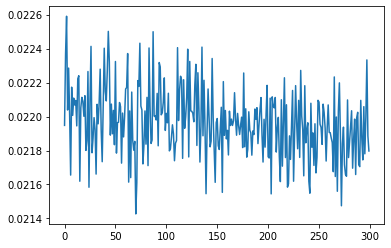

In [569]:
import matplotlib.pyplot as plt
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [570]:
from tensorflow.keras.models import load_model
model = load_model('model.hdf5')

In [571]:
train_predictions = model.predict(X_train)


5/5 [==============================] - 1s 4ms/step


In [572]:
train_predictions=train_predictions.reshape(-1,7)

In [573]:
train_predictions=y_scaler.inverse_transform(train_predictions)

In [574]:
actual=y_train.reshape(-1,7)

In [575]:
Actual=y_scaler.inverse_transform(actual)

In [576]:
Actual

array([[5.310e+02, 4.430e+02, 5.540e+02, 4.500e+02, 2.442e+03, 3.948e+03,
        2.104e+03],
       [4.430e+02, 5.540e+02, 4.500e+02, 2.442e+03, 3.948e+03, 2.104e+03,
        8.700e+02],
       [5.540e+02, 4.500e+02, 2.442e+03, 3.948e+03, 2.104e+03, 8.700e+02,
        6.200e+02],
       [4.500e+02, 2.442e+03, 3.948e+03, 2.104e+03, 8.700e+02, 6.200e+02,
        8.540e+02],
       [2.442e+03, 3.948e+03, 2.104e+03, 8.700e+02, 6.200e+02, 8.540e+02,
        5.480e+02],
       [3.948e+03, 2.104e+03, 8.700e+02, 6.200e+02, 8.540e+02, 5.480e+02,
        2.482e+03],
       [2.104e+03, 8.700e+02, 6.200e+02, 8.540e+02, 5.480e+02, 2.482e+03,
        2.909e+03],
       [8.700e+02, 6.200e+02, 8.540e+02, 5.480e+02, 2.482e+03, 2.909e+03,
        6.540e+02],
       [6.200e+02, 8.540e+02, 5.480e+02, 2.482e+03, 2.909e+03, 6.540e+02,
        7.090e+02],
       [8.540e+02, 5.480e+02, 2.482e+03, 2.909e+03, 6.540e+02, 7.090e+02,
        8.200e+02],
       [5.480e+02, 2.482e+03, 2.909e+03, 6.540e+02, 7.090e+0

In [577]:
pred=train_predictions.reshape(-1,1)
actual=Actual.reshape(-1,1)

In [578]:
pred=pd.DataFrame(pred)

In [579]:
actual=pd.DataFrame(actual)

In [580]:
compare=pd.merge(pred, actual, left_index=True, right_index=True)

In [581]:
compare.columns=['prediction','actual']

In [582]:
compare

,prediction,actual
0,1236.564697,531.0
1,2119.973877,443.0
2,2142.489258,554.0
3,2015.164429,450.0
4,1616.947388,2442.0
...,...,...
975,1446.953979,880.0
976,1095.184326,582.0
977,1699.830566,619.0
978,2353.102051,532.0


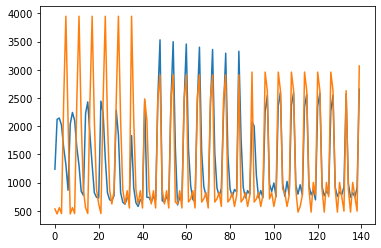

In [584]:
import matplotlib.pyplot as plt
plt.plot(compare['prediction'][:140])
plt.plot(compare['actual'][:140])

In [585]:
train_predictions = model.predict(X_test).flatten()


3/3 [==============================] - 0s 4ms/step


In [586]:
train_predictions=train_predictions.reshape(-1,7)
train_predictions=y_scaler.inverse_transform(train_predictions)

In [587]:
y_test_actual=y_test.reshape(-1,7)
Actual=y_scaler.inverse_transform(y_test_actual)

In [588]:
Actual

array([[1.121e+03, 1.328e+03, 1.112e+03, 9.540e+02, 2.953e+03, 3.012e+03,
        2.753e+03],
       [1.328e+03, 1.112e+03, 9.540e+02, 2.953e+03, 3.012e+03, 2.753e+03,
        1.075e+03],
       [1.112e+03, 9.540e+02, 2.953e+03, 3.012e+03, 2.753e+03, 1.075e+03,
        7.560e+02],
       [9.540e+02, 2.953e+03, 3.012e+03, 2.753e+03, 1.075e+03, 7.560e+02,
        1.157e+03],
       [2.953e+03, 3.012e+03, 2.753e+03, 1.075e+03, 7.560e+02, 1.157e+03,
        9.690e+02],
       [3.012e+03, 2.753e+03, 1.075e+03, 7.560e+02, 1.157e+03, 9.690e+02,
        6.980e+02],
       [2.753e+03, 1.075e+03, 7.560e+02, 1.157e+03, 9.690e+02, 6.980e+02,
        1.370e+03],
       [1.075e+03, 7.560e+02, 1.157e+03, 9.690e+02, 6.980e+02, 1.370e+03,
        2.022e+03],
       [7.560e+02, 1.157e+03, 9.690e+02, 6.980e+02, 1.370e+03, 2.022e+03,
        6.620e+02],
       [1.157e+03, 9.690e+02, 6.980e+02, 1.370e+03, 2.022e+03, 6.620e+02,
        5.080e+02],
       [9.690e+02, 6.980e+02, 1.370e+03, 2.022e+03, 6.620e+0

In [589]:
pred=train_predictions.reshape(-1,1)
actual=Actual.reshape(-1,1)

In [590]:
pred=pd.DataFrame(pred)
actual=pd.DataFrame(actual)

In [600]:
compare=pd.merge(pred, actual, left_index=True, right_index=True)
compare.columns=['prediction','actual']
compare.head(28)

,prediction,actual
0,1292.671021,1121.0
1,884.671021,1328.0
2,1392.981689,1112.0
3,1309.148071,954.0
4,1260.655396,2953.0
5,2270.774170,3012.0
6,2724.496094,2753.0
7,767.154846,1328.0
8,1468.837280,1112.0
9,1386.534180,954.0


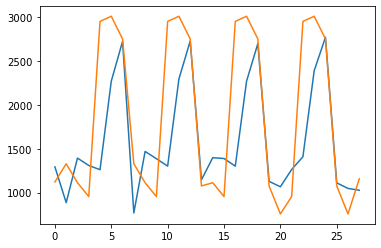

In [601]:
plt.plot(compare['prediction'][:28])
plt.plot(compare['actual'][:28])

In [602]:
pred.sum()

0    537950.0625
dtype: float32

In [603]:
actual.sum()

0    495426.0
dtype: float64